In [246]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sm-datamining-hw1/sample_submission.csv
/kaggle/input/sm-datamining-hw1/train.csv
/kaggle/input/sm-datamining-hw1/test.csv


In [247]:
train = pd.read_csv('/kaggle/input/sm-datamining-hw1/train.csv')
test = pd.read_csv('/kaggle/input/sm-datamining-hw1/test.csv')
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,Canceled
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,Canceled
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,Not_Canceled
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,Not_Canceled
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled


In [248]:
train.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [249]:
train.booking_status.describe()

count            25392
unique               2
top       Not_Canceled
freq             17114
Name: booking_status, dtype: object

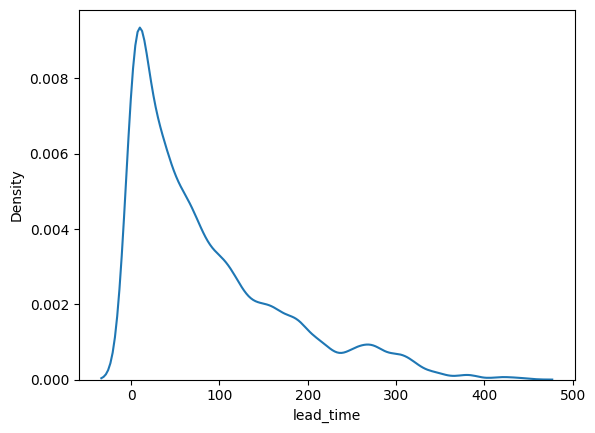

In [250]:
import seaborn as sns
from matplotlib import pyplot as plt
g = sns.kdeplot(train.lead_time)

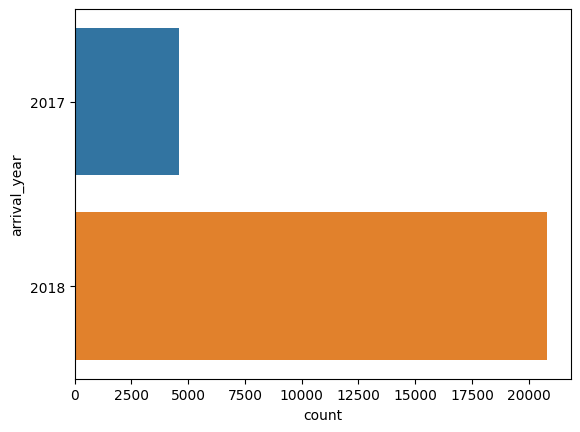

In [251]:
g = sns.countplot(y='arrival_year', data=train)

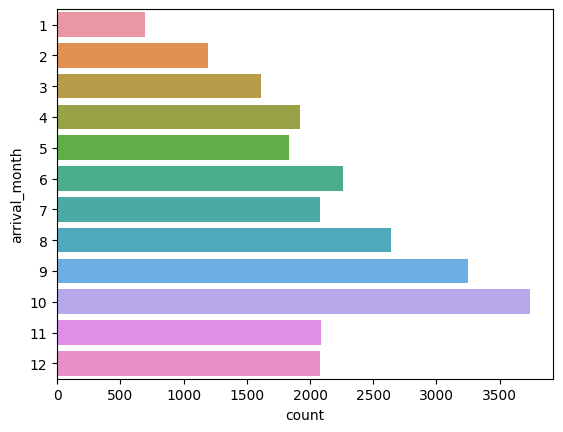

In [252]:
g = sns.countplot(y='arrival_month', data=train)

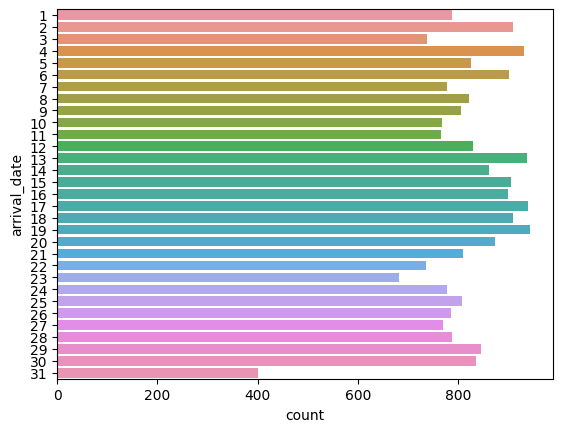

In [253]:
g = sns.countplot(y='arrival_date', data=train)

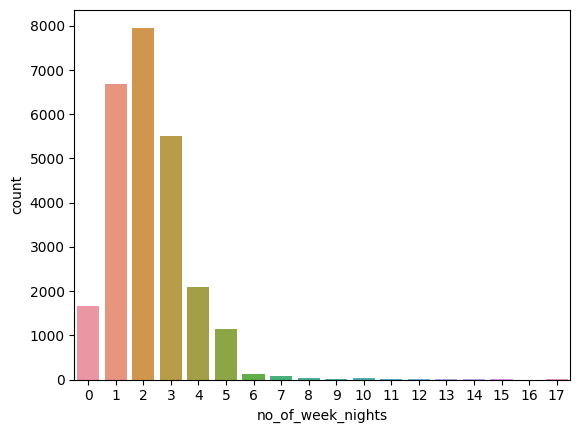

In [254]:
g = sns.countplot(x='no_of_week_nights', data=train)

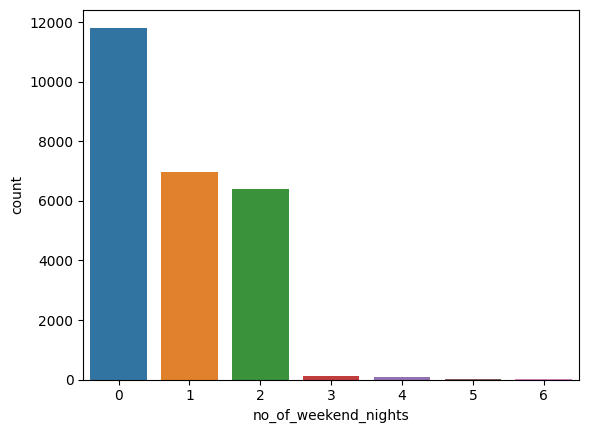

In [255]:
g = sns.countplot(x='no_of_weekend_nights', data=train)

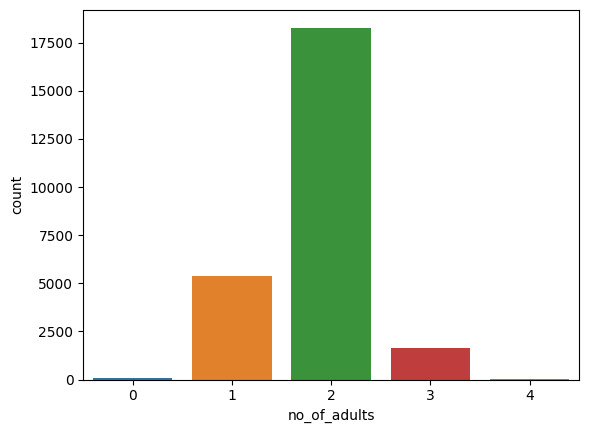

In [256]:
g = sns.countplot(x='no_of_adults', data=train)

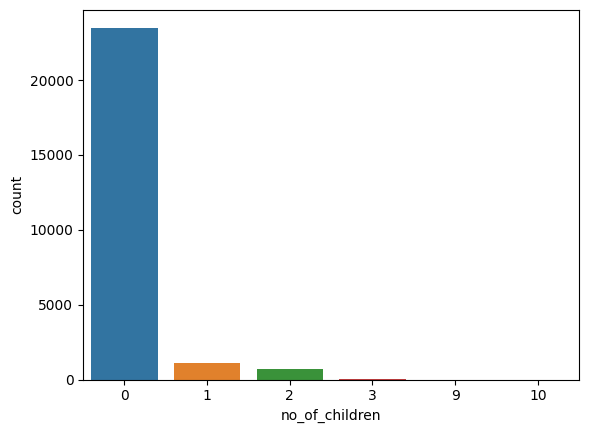

In [257]:
g = sns.countplot(x='no_of_children', data=train)

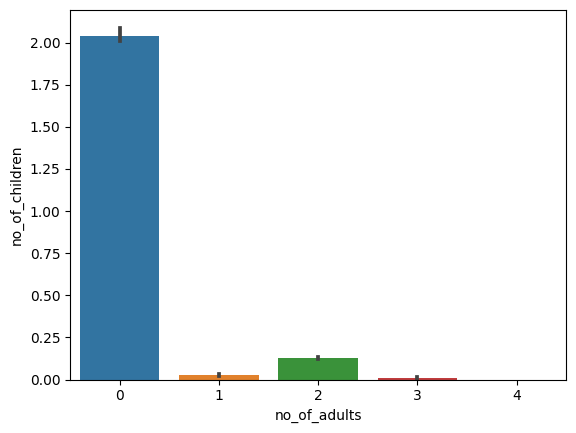

In [258]:
g = sns.barplot(x="no_of_adults", y="no_of_children", data=train, dodge=False)

In [259]:
len(train[(train.no_of_adults == 0) & (train.no_of_children > 1)])

101

In [260]:
train[(train.no_of_adults == 0) & (train.no_of_children > 1)].room_type_reserved.value_counts()

Room_Type 2    97
Room_Type 1     2
Room_Type 6     1
Room_Type 7     1
Name: room_type_reserved, dtype: int64

In [261]:
train[(train.no_of_adults == 0) & (train.no_of_children > 1)].arrival_month.value_counts()

12    18
8     16
10    15
7     10
9      7
2      7
1      5
11     5
5      5
6      5
3      4
4      4
Name: arrival_month, dtype: int64

In [262]:
train[(train.no_of_adults == 0) & (train.no_of_children > 1)].no_of_special_requests.value_counts()

1    40
0    37
2    18
3     4
4     2
Name: no_of_special_requests, dtype: int64

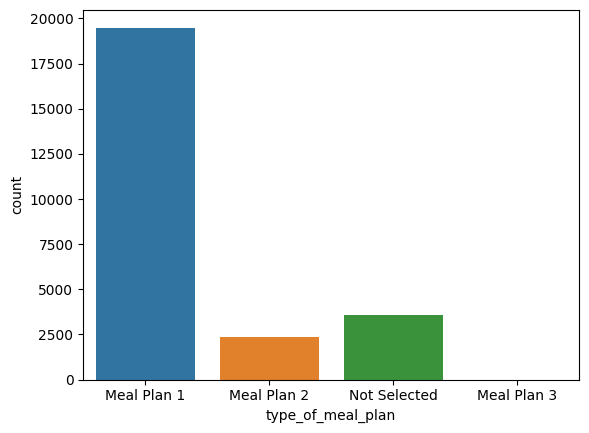

In [263]:
g = sns.countplot(x='type_of_meal_plan', data=train)

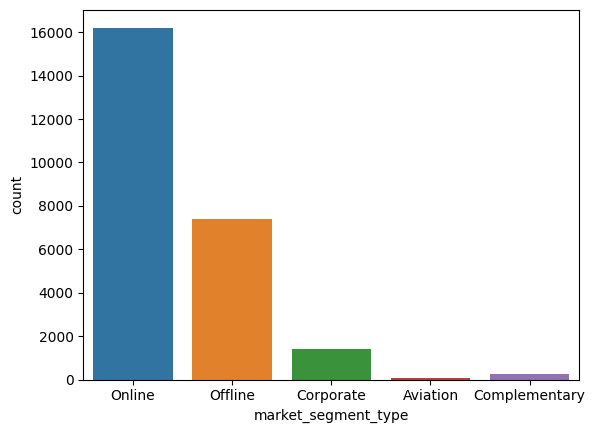

In [264]:
g = sns.countplot(x='market_segment_type', data=train)

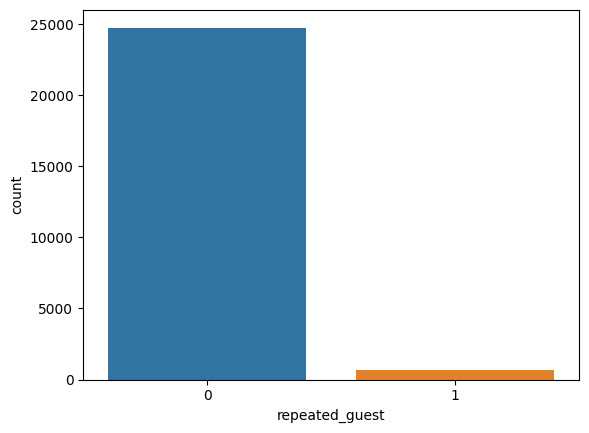

In [265]:
g = sns.countplot(x='repeated_guest', data=train)

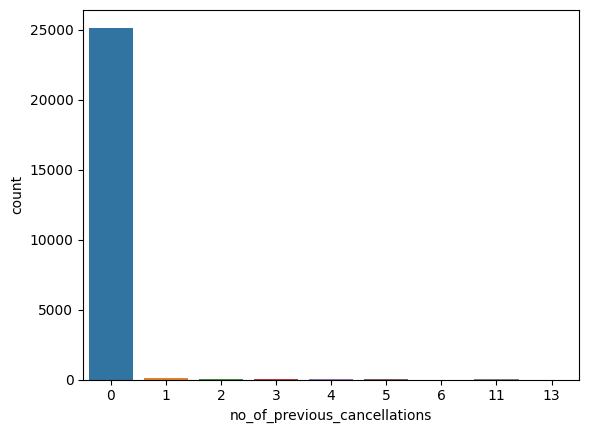

In [266]:
g = sns.countplot(x='no_of_previous_cancellations', data=train)

In [267]:
train.no_of_previous_bookings_not_canceled.value_counts().nlargest(10)/len(train)*100

0    97.767013
1     0.637996
2     0.299307
3     0.224480
4     0.181159
5     0.161468
6     0.086641
8     0.074827
7     0.063012
9     0.055135
Name: no_of_previous_bookings_not_canceled, dtype: float64

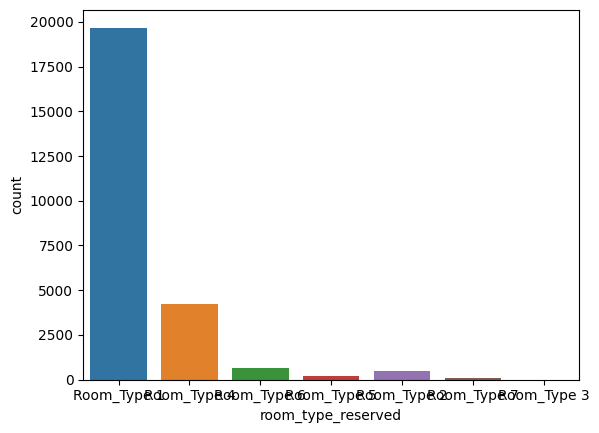

In [268]:
g = sns.countplot(x='room_type_reserved', data=train)

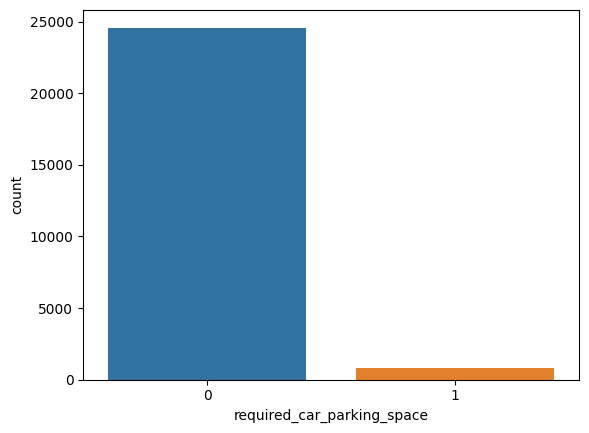

In [269]:
g = sns.countplot(x='required_car_parking_space', data=train)

In [270]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train['lead_time'] = sc.fit_transform(train['lead_time'].values.reshape(-1,1))

In [271]:
train['booking_status']

0            Canceled
1            Canceled
2        Not_Canceled
3        Not_Canceled
4        Not_Canceled
             ...     
25387    Not_Canceled
25388        Canceled
25389    Not_Canceled
25390        Canceled
25391    Not_Canceled
Name: booking_status, Length: 25392, dtype: object

In [272]:
train['booking_status'] = train['booking_status'].replace({'Canceled':1, 'Not_Canceled':0})

In [273]:
train['type_of_meal_plan'] = train.type_of_meal_plan.astype('category').cat.codes
train['market_segment_type'] = train.market_segment_type.astype('category').cat.codes
train['room_type_reserved'] = train.room_type_reserved.astype('category').cat.codes

In [274]:
train.isnull().sum(axis=0)

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [275]:
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,0,0,0,0.451467,2018,8,29,4,0,0,0,90.95,0,1
1,INN06326,2,0,1,3,0,0,0,0.178330,2018,3,24,4,0,0,0,90.95,1,1
2,INN33900,2,0,1,4,0,0,3,0.176072,2018,4,6,4,0,0,0,99.45,1,0
3,INN00721,2,0,2,0,0,0,0,0.137698,2017,10,4,3,0,0,0,91.00,0,0
4,INN22121,2,1,0,4,0,0,0,0.453725,2018,11,1,4,0,0,0,82.28,3,0


In [276]:
train = train.drop(["Booking_ID", "arrival_date"], axis=1)

In [277]:
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,3,0,0,0,0.451467,2018,8,4,0,0,0,90.95,0,1
1,2,0,1,3,0,0,0,0.178330,2018,3,4,0,0,0,90.95,1,1
2,2,0,1,4,0,0,3,0.176072,2018,4,4,0,0,0,99.45,1,0
3,2,0,2,0,0,0,0,0.137698,2017,10,3,0,0,0,91.00,0,0
4,2,1,0,4,0,0,0,0.453725,2018,11,4,0,0,0,82.28,3,0


In [278]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
X = train.drop("booking_status", axis=1)
y = train["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

t = tree.DecisionTreeClassifier()

grid = {'min_samples_split': [5, 10, 20, 50, 100]}, 
dt_model = GridSearchCV(t, grid, cv=10)
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.8655


In [279]:
test
test['lead_time'] = sc.fit_transform(test['lead_time'].values.reshape(-1,1))
test['type_of_meal_plan'] = test.type_of_meal_plan.astype('category').cat.codes
test['market_segment_type'] = test.market_segment_type.astype('category').cat.codes
test['room_type_reserved'] = test.room_type_reserved.astype('category').cat.codes
test=test.drop(["Booking_ID", "arrival_date"], axis=1)
x_test=test

In [280]:
prediction_list= dt_model.predict(x_test)
submit = pd.read_csv("/kaggle/input/sm-datamining-hw1/sample_submission.csv")
submit["booking_status"] = prediction_list
submit = submit.replace({'Canceled':1, 'Not_Canceled':0})
submit

,Booking_ID,booking_status
0,INN04969,0
1,INN34541,0
2,INN36109,0
3,INN01554,1
4,INN24975,0
...,...,...
10878,INN29686,0
10879,INN01107,1
10880,INN06811,0
10881,INN27777,1


In [281]:
submit.to_csv("dt_submit.csv",index=False)